In [1]:
import model as m
import csv
#import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')
#import pickle
#import theano
#import theano.tensor as T
from scipy import stats
#from sklearn import datasets
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import scale

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
with open('targets.csv') as f:
    reader = csv.reader(f)
    targets_all = next(reader)
    
print('Total '+str(len(targets_all))+' targets:')
print(targets_all)

Total 26 targets:
['AVG_DEMAND_KW_CALCULATED_12', 'NSN_LF59_BLDG-CDW-LOOP_CDW-FLOW', 'NSN_LF59_BLDG-CDW-LOOP_CDW-T-R', 'NSN_LF59_BLDG-CDW-LOOP_CDW-T-S', 'NSN_LF59_COOLING-TOWER_FAN-HI', 'NSN_LF59_COOLING-TOWER_FAN-LO', 'NSN_LF59_COOLING-TOWER_FAN-STAT', 'NSN_LF59_CWP-1-VFD_VFD-SIG', 'NSN_LF59_CWP-1_PMP', 'NSN_LF59_CWP-1_PMP-STAT', 'NSN_LF59_BOILER-1_HW-T-E', 'NSN_LF59_BOILER-1_HW-T-L', 'NSN_LF59_PWSHP-2_CLG-COIL-T', 'NSN_LF59_PWSHP-2_OA-FLOW', 'NSN_LF59_PWSHP-2_SA-T', 'NSN_LF59_PWSHP-2_SA-T-STPT', 'NSN_LF59_WSHP-01_DA-T', 'NSN_LF59_WSHP-01_LW-T', 'NSN_LF59_WSHP-01_ZN-STPT-CL-EFF', 'NSN_LF59_WSHP-01_ZN-STPT-HT-EFF', 'NSN_LF59_WSHP-01_ZN-T', 'NSN_LF59_WSHP-12_DA-T', 'NSN_LF59_WSHP-12_LW-T', 'NSN_LF59_WSHP-12_ZN-STPT-CL-EFF', 'NSN_LF59_WSHP-12_ZN-STPT-HT-EFF', 'NSN_LF59_WSHP-12_ZN-T']


In [3]:
path_to_data = './data/'
year = '2020'
# targets = targets_all
# targets = ['AVG_DEMAND_KW_CALCULATED_12','NSN_LF59_BLDG-CDW-LOOP_CDW-FLOW','NSN_LF59_BLDG-CDW-LOOP_CDW-T-R','NSN_LF59_BLDG-CDW-LOOP_CDW-T-S','NSN_LF59_COOLING-TOWER_FAN-HI','NSN_LF59_COOLING-TOWER_FAN-LO','NSN_LF59_COOLING-TOWER_FAN-STAT','NSN_LF59_CWP-1-VFD_VFD-SIG','NSN_LF59_CWP-1_PMP','NSN_LF59_CWP-1_PMP-STAT','NSN_LF59_BOILER-1_HW-T-E','NSN_LF59_BOILER-1_HW-T-L','NSN_LF59_PWSHP-2_CLG-COIL-T','NSN_LF59_PWSHP-2_OA-FLOW','NSN_LF59_PWSHP-2_SA-T','NSN_LF59_PWSHP-2_SA-T-STPT','NSN_LF59_WSHP-01_DA-T','NSN_LF59_WSHP-01_LW-T','NSN_LF59_WSHP-01_ZN-STPT-CL-EFF','NSN_LF59_WSHP-01_ZN-STPT-HT-EFF','NSN_LF59_WSHP-01_ZN-T','NSN_LF59_WSHP-12_DA-T','NSN_LF59_WSHP-12_LW-T','NSN_LF59_WSHP-12_ZN-STPT-CL-EFF','NSN_LF59_WSHP-12_ZN-STPT-HT-EFF','NSN_LF59_WSHP-12_ZN-T','NSN_LF59_BuildingKWhdSum','NSN_LF59_BuildingKWHdSumAnnualized']
# targets = [targets_all[0]]
targets = ['NSN_LF59_WSHP-01_ZN-T']
for target in targets:
    print('Target: '+target)

datafilename = 'train_data_'+year+'.csv'
data = pd.read_csv(path_to_data+datafilename)

X = np.vstack((data.index.to_numpy(), data['HOD'].to_numpy(), data['Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)'].to_numpy())).T
X[:,0] = X[:,0] / 35040.0
X[:,1] = X[:,1] / 24.0
X[:,2] = (X[:,2]+20.0) / 60.0

x_train = X

Target: NSN_LF59_WSHP-01_ZN-T


Normalizing target with mean: 70.04446188071957 and std: 7.667146180610784
(16580, 3)
(16580, 1)
Working on NSN_LF59_WSHP-01_ZN-T...


Finished [100%]: Average Loss = 3.9494e+08


Model for NSN_LF59_WSHP-01_ZN-T Complete!


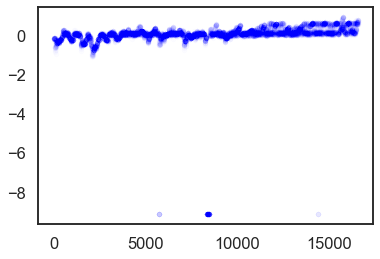

In [4]:
### training

model_exist = False

for target in targets:

    if target in ['AVG_DEMAND_KW_CALCULATED_12','NSN_LF59_BLDG-CDW-LOOP_CDW-FLOW','NSN_LF59_BLDG-CDW-LOOP_CDW-T-R','NSN_LF59_BLDG-CDW-LOOP_CDW-T-S','NSN_LF59_CWP-1-VFD_VFD-SIG','NSN_LF59_BOILER-1_HW-T-E','NSN_LF59_BOILER-1_HW-T-L','NSN_LF59_PWSHP-2_CLG-COIL-T','NSN_LF59_PWSHP-2_OA-FLOW','NSN_LF59_PWSHP-2_SA-T','NSN_LF59_PWSHP-2_SA-T-STPT','NSN_LF59_WSHP-01_DA-T','NSN_LF59_WSHP-01_LW-T','NSN_LF59_WSHP-01_ZN-STPT-CL-EFF','NSN_LF59_WSHP-01_ZN-STPT-HT-EFF','NSN_LF59_WSHP-01_ZN-T','NSN_LF59_WSHP-12_DA-T','NSN_LF59_WSHP-12_LW-T','NSN_LF59_WSHP-12_ZN-STPT-CL-EFF','NSN_LF59_WSHP-12_ZN-STPT-HT-EFF','NSN_LF59_WSHP-12_ZN-T']:
        tardis = 'Normal'
    elif target in ['NSN_LF59_COOLING-TOWER_FAN-HI','NSN_LF59_COOLING-TOWER_FAN-LO','NSN_LF59_COOLING-TOWER_FAN-STAT','NSN_LF59_CWP-1_PMP','NSN_LF59_CWP-1_PMP-STAT']:
        tardis = 'Bernoulli'
    
    y_train = data[target].to_numpy()
    if tardis=='Normal':
        scale_mean = np.mean(y_train)
        scale_std = np.std(y_train)
        print('Normalizing target with mean: ' + str(scale_mean) + ' and std: ' + str(scale_std))
        y_train = (y_train - np.mean(y_train)) / np.std(y_train)
    elif tardis == 'Bernoulli':
        print('Binary target does not normalization.')
    y_train = y_train[:, None]
    print(x_train.shape)
    print(y_train.shape)

    x_p = x_train[:,0] * 35040.0
    plt.figure()
    plt.plot(x_p, y_train, '.b', alpha=0.01)

    if model_exist == False:
        trace= m.train_model(target=target, x_train=x_train, y_train=y_train, tardis=tardis)


(1000, 35039)
(35039,)


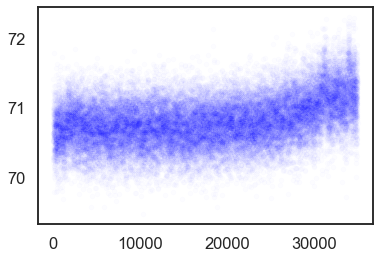

In [5]:
### predicting

x_test = pd.read_csv(path_to_data+'test_x.csv').to_numpy()
x_test[:,0] = x_test[:,0] / 35040.0
x_test[:,1] = x_test[:,1] / 24.0
x_test[:,2] = (x_test[:,2]+20.0) / 60.0
x_ind = x_test[:,0] * 35040.0

for target in targets:
    if target in ['AVG_DEMAND_KW_CALCULATED_12','NSN_LF59_BLDG-CDW-LOOP_CDW-FLOW','NSN_LF59_BLDG-CDW-LOOP_CDW-T-R','NSN_LF59_BLDG-CDW-LOOP_CDW-T-S','NSN_LF59_CWP-1-VFD_VFD-SIG','NSN_LF59_BOILER-1_HW-T-E','NSN_LF59_BOILER-1_HW-T-L','NSN_LF59_PWSHP-2_CLG-COIL-T','NSN_LF59_PWSHP-2_OA-FLOW','NSN_LF59_PWSHP-2_SA-T','NSN_LF59_PWSHP-2_SA-T-STPT','NSN_LF59_WSHP-01_DA-T','NSN_LF59_WSHP-01_LW-T','NSN_LF59_WSHP-01_ZN-STPT-CL-EFF','NSN_LF59_WSHP-01_ZN-STPT-HT-EFF','NSN_LF59_WSHP-01_ZN-T','NSN_LF59_WSHP-12_DA-T','NSN_LF59_WSHP-12_LW-T','NSN_LF59_WSHP-12_ZN-STPT-CL-EFF','NSN_LF59_WSHP-12_ZN-STPT-HT-EFF','NSN_LF59_WSHP-12_ZN-T']:
        tardis = 'Normal'
    elif target in ['NSN_LF59_COOLING-TOWER_FAN-HI','NSN_LF59_COOLING-TOWER_FAN-LO','NSN_LF59_COOLING-TOWER_FAN-STAT','NSN_LF59_CWP-1_PMP','NSN_LF59_CWP-1_PMP-STAT']:
        tardis = 'Bernoulli'
        
    with m.construct_nn(X=x_test, Y=True, tardis=tardis) as test_model:
        if model_exist == True:
            trace = pm.load_trace(directory= './model/'+target)
        ppc = pm.sample_posterior_predictive(trace)
        pred_sample = ppc['out']

    print(pred_sample.shape)
    if tardis == 'Normal':
        pred_sample = pred_sample * scale_std + scale_mean
        pred = np.median(pred_sample, axis=0)
    elif tardis == 'Bernoulli':
        pred, count_pred = stats.mode(pred_sample)
        pred = pred.T
        
    print(pred.shape)    
    plt.figure()
    plt.plot(x_ind, pred, '.b', alpha=0.01)

    pred_data = pd.DataFrame(data=pred, index=x_ind, columns=[target])
    pred_data.to_csv('./pred/'+target+'.csv')
